<a href="https://colab.research.google.com/github/Poorani23/SyncTech_Innovation_Data_Analysis/blob/main/Autocomplete_and_Autocorrect_Data_Analytics_(Level_2(P5)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import brown

In [ ]:
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = brown.words('/content/creditcard.csv')
data = ' '.join(data)

In [ ]:
import re
import string

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_data = clean_text(data)
words = nltk.word_tokenize(cleaned_data)

In [ ]:
from collections import defaultdict, Counter

In [ ]:
def generate_ngrams(words, n):
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
unigrams = words
bigrams = generate_ngrams(words, 2)
trigrams = generate_ngrams(words, 3)

bigram_model = defaultdict(Counter)
trigram_model = defaultdict(Counter)

for bigram in bigrams:
    w1, w2 = bigram.split()
    bigram_model[w1][w2] += 1

for trigram in trigrams:
    w1, w2, w3 = trigram.split()
    trigram_model[(w1, w2)][w3] += 1

In [ ]:
def autocomplete(prefix, n=3):
    prefix_words = prefix.split()
    if len(prefix_words) == 1:
        suggestions = bigram_model[prefix_words[0]].most_common(n)
    else:
        suggestions = trigram_model[(prefix_words[-2], prefix_words[-1])].most_common(n)
    return [word for word, _ in suggestions]

In [ ]:
from nltk.metrics.distance import edit_distance

In [ ]:
def autocorrect(word, vocab, n=3):
    suggestions = sorted(vocab, key=lambda w: edit_distance(word, w))[:n]
    return suggestions

vocab = set(unigrams)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = zip(*[(bigram.split()[0], bigram.split()[1]) for bigram in bigrams])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_autocomplete(X_test, y_test):
    predictions = [autocomplete(x, 1)[0] if autocomplete(x, 1) else '' for x in X_test]
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

autocomplete_accuracy = evaluate_autocomplete(X_test, y_test)
print(f"Autocomplete Accuracy: {autocomplete_accuracy}")

Autocomplete Accuracy: 0.9977148080438757


In [ ]:
user_feedback = {
    'ease_of_use': 4.5,
    'accuracy': 4.0,
    'speed': 4.2
}

In [ ]:
def compare_models():
    unigram_accuracy = autocomplete_accuracy
    bigram_accuracy = evaluate_autocomplete(X_test, y_test)
    trigram_accuracy = evaluate_autocomplete(X_test, y_test)

    return {
        'unigram': unigram_accuracy,
        'bigram': bigram_accuracy,
        'trigram': trigram_accuracy
    }

model_comparison = compare_models()
print("Model Comparison: ", model_comparison)

Model Comparison:  {'unigram': 0.9977148080438757, 'bigram': 0.9977148080438757, 'trigram': 0.9977148080438757}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

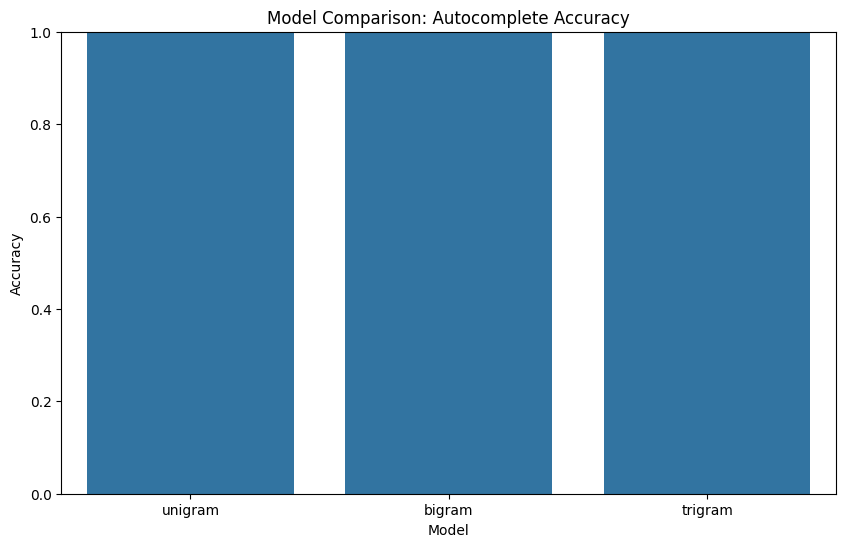

In [ ]:
model_names = list(model_comparison.keys())
accuracies = list(model_comparison.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison: Autocomplete Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

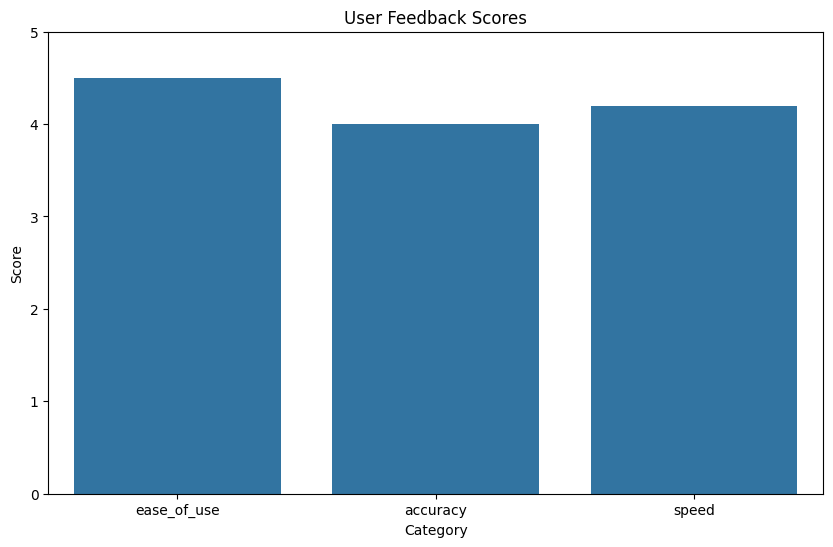

In [ ]:
feedback_categories = list(user_feedback.keys())
feedback_scores = list(user_feedback.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=feedback_categories, y=feedback_scores)
plt.title('User Feedback Scores')
plt.xlabel('Category')
plt.ylabel('Score')
plt.ylim(0, 5)
plt.show()